###### Ed Bharucha

# Useful links

[Chris Albon - Tips & Tricks](https://chrisalbon.com/)

# Regex

* .: Wilcard match single character
* ^: Start of string
* $: End of string
* []: Matches one of the set of characters in []
* [a-z]: Matches one of a, b, ..., z
* [^abc]: Matches character NOT a, b or c
* a|b: Mataches a or b, where a & b are strings
* (): Scoping for operators
* \: Escape character for special characters e.g. \t, \n, \b
* \b: Matches word boundary
* \d: Matches any digit [0-9]
* \D: Matches any non-digit [^0-9]
* \s: Matches any whitespace [\t\n\r\f\v]
* \S: Matches any non-whitespace [^\t\n\r\f\v]
* \w: Matches any alphanumeric [a-zA-Z0-9_]
* \W: Matches any non-alphanumeric [^a-zA-Z0-9_]
* *: Matches 0 or more times
* +: Matches 1 or more times
* ?: Matches 0 or 1
* {n}: Matches exactly n repititions, n>=0
* {n,}: Matches at least n repititions, n>=0
* {,n}: Matches at most n repititions, n>=0
* {n,m}: Matches at least n & at most m repititions, n>=0, m>=0


In [ ]:
import re

s = 'The quick brown fox jumps over the lazy dog & = ##'

# Match all alphanumeric
print ([w for w in s.split(' ') if re.search('\w', w)])

dates = ['1/11/2020', '11/1/2020', 'Jan-1-2020', '1/11/20']
print ([date for date in dates if re.findall(r'\w{1,3}[/-]\d{1,2}[/-]\d{2,4}', date)])

In [ ]:
import pandas as pd

time_sentences = ["Monday: The doctor's appointment is at 2:45pm.", 
                  "Tuesday: The dentist's appointment is at 11:30 am.",
                  "Wednesday: At 7:00pm, there is a basketball game!",
                  "Thursday: Be back home by 11:15 pm at the latest.",
                  "Friday: Take the train at 08:10 am, arrive at 09:00am."]

df = pd.DataFrame(time_sentences, columns=['text'])

In [ ]:
# find the number of characters for each string in df['text']
df['text'].str.len()

In [ ]:
# find the number of tokens for each string in df['text']
df['text'].str.split().str.len()

In [ ]:
# find which entries contain the word 'appointment'
df['text'].str.contains('appointment')

In [ ]:
# find how many times a digit occurs in each string
df['text'].str.count(r'\d')

In [ ]:
# find all occurances of the digits
df['text'].str.findall(r'\d')

In [ ]:
# group and find the hours and minutes
df['text'].str.findall(r'(\d?\d):(\d\d)')

In [ ]:
# replace weekdays with '???'
df['text'].str.replace(r'\w+day\b', '???')

In [ ]:
# replace weekdays with 3 letter abbrevations
df['text'].str.replace(r'(\w+day\b)', lambda x: x.groups()[0][:3])

In [ ]:
# create new columns from first match of extracted groups
df['text'].str.extract(r'(\d?\d):(\d\d)')

In [ ]:
# extract the entire time, the hours, the minutes, and the period
df['text'].str.extractall(r'((\d?\d):(\d\d) ?([ap]m))')

In [ ]:
# extract the entire time, the hours, the minutes, and the period with group names
df['text'].str.extractall(r'(?P<time>(?P<hour>\d?\d):(?P<minute>\d\d) ?(?P<period>[ap]m))')

# Git

In [ ]:
git config --global user.name "<username>"
git config --global user.email "<user email>"
git config --list
git config --help

git init
git status

git add -A
git reset
git commit -m "<comment>"
git log

git clone <remote repo> <destination>
git remote -v
git diff

git pull origin master
git push origin master

# create branch
git branch <branch name>

# list branches & get branch status
git branch 
git branch -a

#switch to branch
git checkout <branch name>

#make changes to code, stage & commit to branch
git add -a
git commit -m <>

#push changes from branch to remote repository
 git push -u origin <branch name>

#merge changes with master
git checkout master
git pull origin master 
git branch --merged
git merge hangman-lap
git push origin master

git reset --hard HEAD^  # Roll back last commit
git reset --hard HEAD~2  # Roll back last 2 commits

git branch -d <branch name> #delete local branch
git push origin --delete <branch name> #delete remote branch

# remove directories from git

git rm -rf <dir name separated by space>  # not the -f flag is for forced removal.  Can do without it as well.
git commit -m "<comment>"
git push origin master

-------------------
git status

git add *

git commit -m "Comments"

git push origin master

git rm -r --cached djangoproject/

git commit -m "Comments"

git push origin master

git pull

git log

git reset --hard <commit>  # get commit from git log
git reset --hard origin/master

git reflog


# Virtual Environments

In [ ]:
virtualenv <env_name>  # will create virtual env env_name in directory env_name

virtualenv . # will create virtual env in current dir

scripts/activate

scripts/deactivate

# Pickle data

In [ ]:
import pickle
import numpy as np

# Write
# with open ('data/test.pkl', 'wb') as pklfile:
#     pickle.dump(df, pklfile)

# Read
with open ('data/test.pkl', 'rb') as pklfile:
    df = pickle.load(pklfile)
    
with open ('data/test1.pkl', 'rb') as pklfile:
    df1 = pickle.load(pklfile)
    
with open ('data/test2.pkl', 'rb') as pklfile:
    df2 = pickle.load(pklfile)

In [ ]:
df3 = df.copy()
df3['winner'] = np.where(df['winner_enc']==df['fighter1_enc'], 1, 2)
df3.drop(columns=['fighter1_enc', 'fighter2_enc', 'winner_enc'], inplace=True)

# Misc

In [ ]:
# Install requirements

pip install -r requirements.txt

In [ ]:
# Accessing index in for loops

l = range(10,30,2)
for idx, val in enumerate(l):
    print (idx, val)

In [ ]:
# Aggregating elements across 2 iterables

l1 = [1,2,3,4,5,6,7]
l2 = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']

for val in zip (l1, l2):
    print (val)

In [ ]:
# # Progress bar

from tqdm import tqdm_notebook as tqdm

for i in tqdm(range(1000)):
    print (i)

# Plotting

## Matplotlib

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('data/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, py_salaries, label='Python')
plt.plot(ages, js_salaries, label='JavaScript')

plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

In [1]:
import matplotlib.pyplot as plt

print (plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


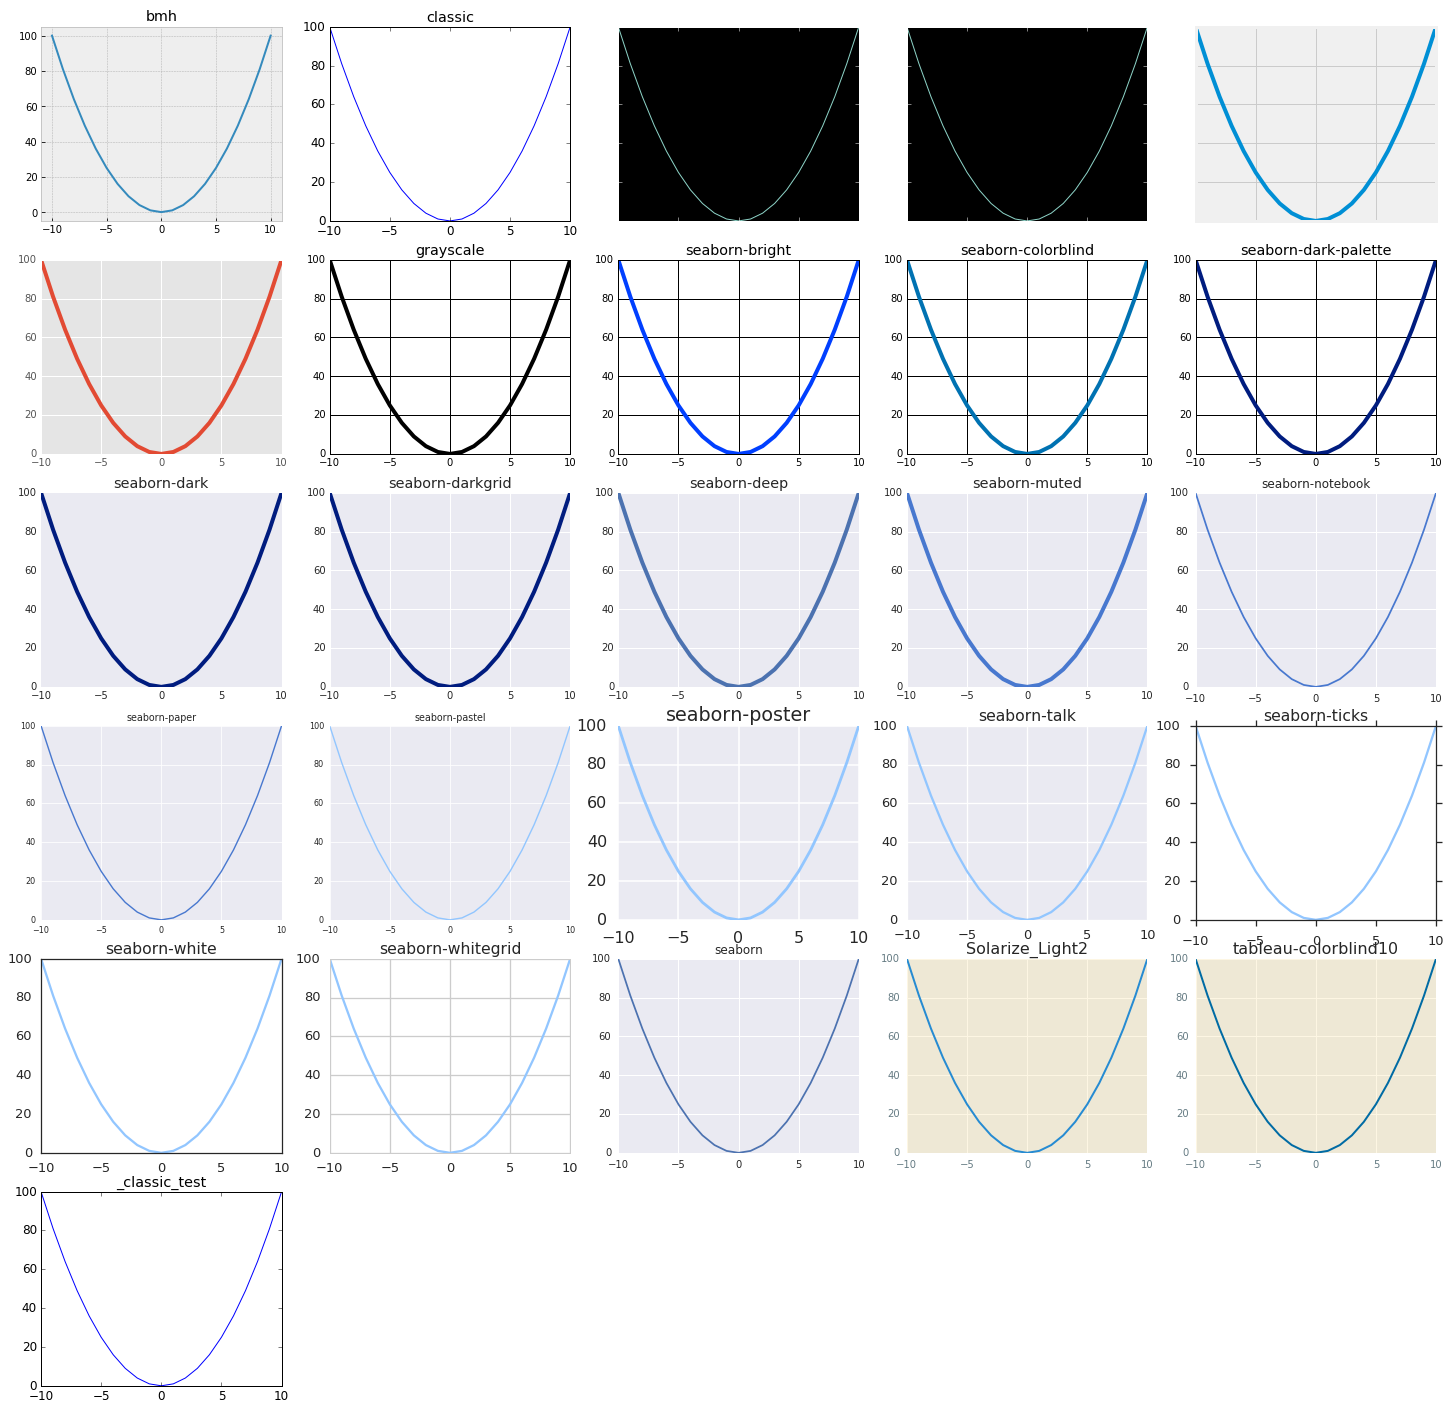

In [2]:
import numpy as np
x = np.arange(-10,11)
y = x**2

import math
i = 1
cols = 5
rows = math.ceil(len(plt.style.available)/cols)
plt.figure(figsize=(25,25))
for style in plt.style.available:
    plt.style.use(style)
    plt.subplot(rows, cols, i)
    plt.plot(x, y)
    plt.title(style)
    i+=1
plt.show()

In [3]:
plt.style.use('fivethirtyeight')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']                       
print('\n'.join(color for color in colors))                                      

#008fd5
#fc4f30
#e5ae38
#6d904f
#8b8b8b
#810f7c


## Seaborn

In [73]:
import seaborn as sns

df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


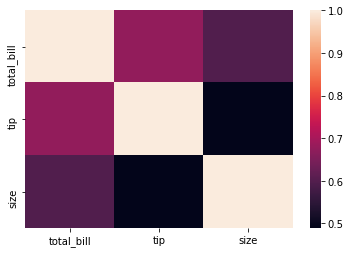

In [74]:
sns.heatmap(df.corr())

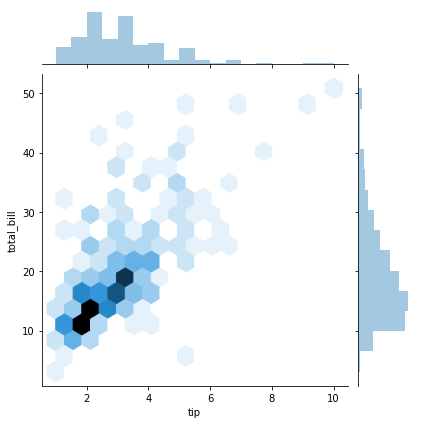

In [75]:
### Jointplot (univariate analysis)
sns.jointplot(x='tip', y='total_bill', data=df, kind='hex')

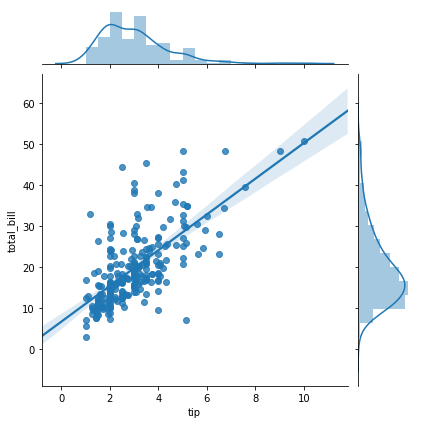

In [76]:
sns.jointplot(x='tip', y='total_bill', data=df, kind='reg')

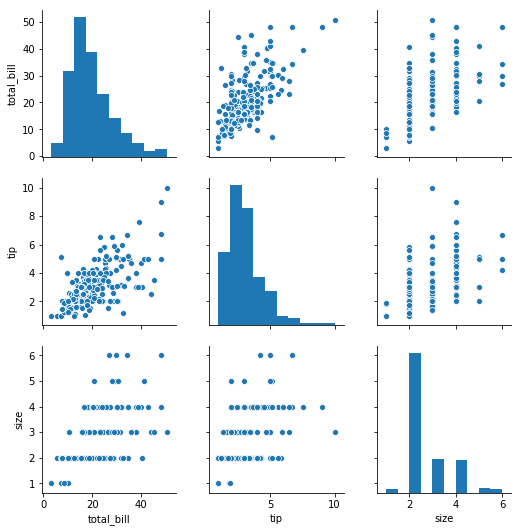

In [77]:
### Pairplot (bivariate analysis)
sns.pairplot(df)

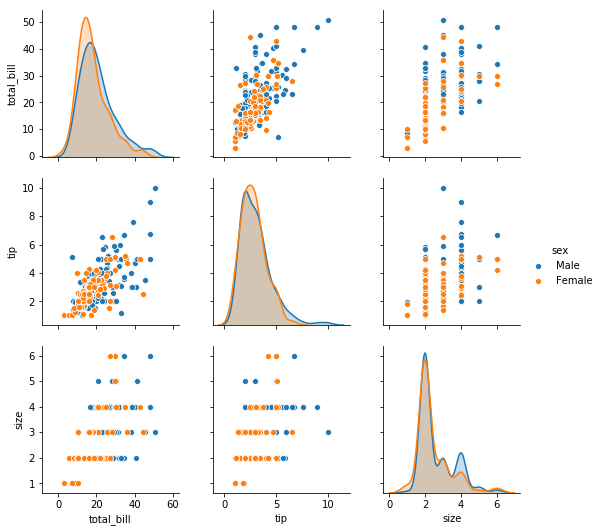

In [78]:
sns.pairplot(df, hue='sex')

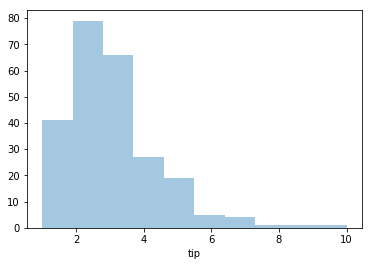

In [81]:
### Distplot
sns.distplot(df['tip'], kde=False, bins=10)

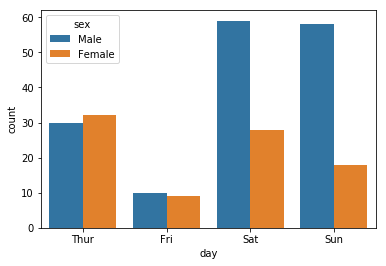

In [84]:
### Countplot
sns.countplot(x='day', hue='sex', data=df)

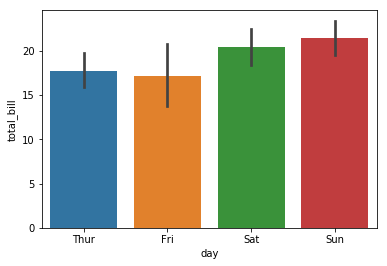

In [42]:
### Barplot
sns.barplot(x='day', y='total_bill', data=df)

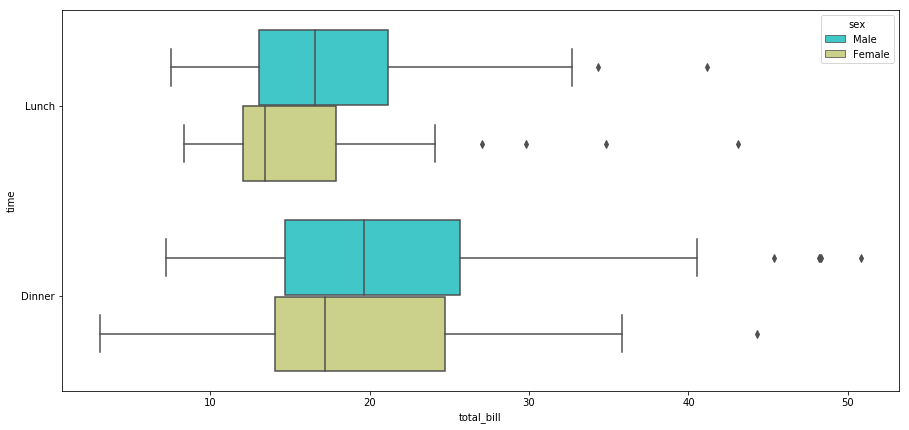

In [69]:
### Boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.boxplot(y='time', x='total_bill', data=df, palette='rainbow', orient='h', hue='sex')
plt.show()

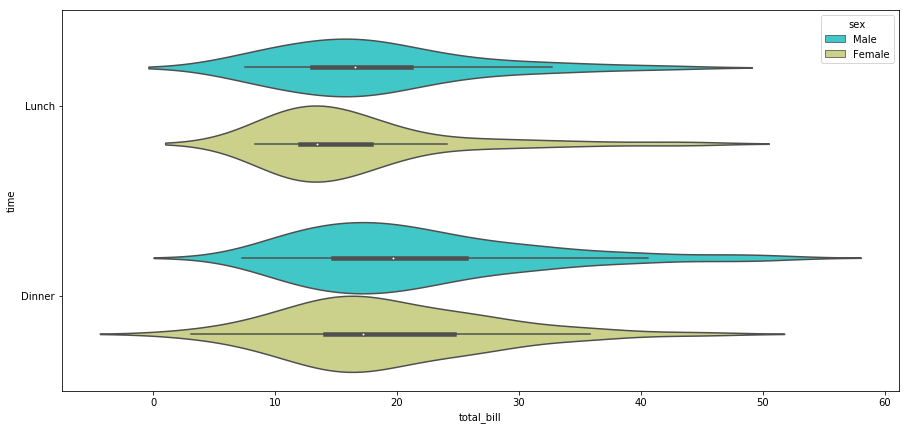

In [72]:
### Violinplot

plt.figure(figsize=(15,7))
sns.violinplot(y='time', x='total_bill', data=df, palette='rainbow', orient='h', hue='sex')


## Subplots

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('data/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.figure(figsize=(20,10))

ax1 = plt.subplot(2,2,1)
ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')
ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Median Salary (USD)')

ax2 = plt.subplot(2,2,2)
ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')
ax2.legend()
ax2.set_title('Median Salary (USD) by Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Median Salary (USD)')

ax3 = plt.subplot(2,2,3)
ax3.plot(ages, py_salaries, label='Python')
ax3.plot(ages, js_salaries, label='JavaScript')
ax3.legend()
ax3.set_title('Median Salary (USD) by Age')
ax3.set_xlabel('Age')
ax3.set_ylabel('Median Salary (USD)')

ax4 = plt.subplot(2,2,4)
ax4.plot(ages, dev_salaries, label='ALLDEVS')
ax5 = ax4.twinx()
ax5.plot(ages, js_salaries, label='JavaScript')
ax4.legend()
ax5.legend()
ax4.set_xlabel('Age')
ax4.set_ylabel('Python Salary (USD)')
ax5.set_ylabel('Javascript Salary (USD)')

plt.show()

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('data/data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,7))

# fig1, ax1 = plt.subplots()
# fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax3.plot(ages, dev_salaries, label='ALLDEVS')
ax4 = ax3.twinx()                             # Twinx
ax4.plot(ages, py_salaries, label='PYTHON')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

ax3.legend()
ax3.set_title('MEDIAN SALARY (USD) by AGE')
ax3.set_ylabel('MEDIAN SALARY (USD)')


plt.tight_layout()

plt.show()

fig1.savefig('data/fig1.png')
fig2.savefig('data/fig2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

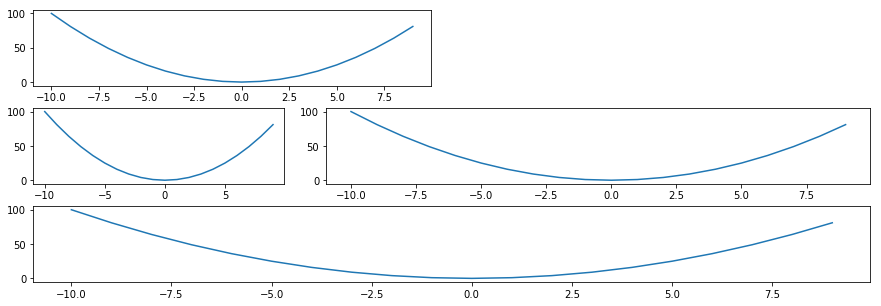

In [7]:
import pyforest

x = np.arange(-10,10)
y = x**2

plt.figure(figsize=(15,5))

grid = plt.GridSpec(3, 6, wspace=0.4, hspace=0.3)

plt.subplot(grid[0,:3])
plt.plot(x,y)
plt.subplot(grid[1,:2])
plt.plot(x,y)
plt.subplot(grid[1,2:])
plt.plot(x,y)
plt.subplot(grid[2,:])
plt.plot(x,y)

plt.show()

# [Exploratory Data Analysis](https://github.com/krishnaik06/EDA1)

# Image Processing

## Image Preprocessing

### Resize & Center images

In [ ]:
# Standardize images

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Helper function to resize image
def resize_image(img, size): 
    from PIL import Image, ImageOps 
    
    # resize the image so the longest dimension matches our target size
    img.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new square white background image
    newimg = Image.new("RGB", size, (255, 255, 255))
    
    # Paste the resized image into the center of the square background
    if np.array(img).shape[2] == 4:
        # If the source is in RGBA format, use a mask to eliminate the transparency
        newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)), mask=img.split()[3])
    else:
        newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
  
    # return the resized image
    return newimg


# Create resized copies of all of the source images
size = (128,128)

indir = 'gear_images'
outdir = 'resized_images'

# Create the output folder if it doesn't already exist
if os.path.exists(outdir):
    shutil.rmtree(outdir)

# Loop through each subfolder in the input dir
for root, dirs, filenames in os.walk(indir):
    for d in dirs:
        print('processing folder ' + d)
        # Create a matching subfolder in the output dir
        saveFolder = os.path.join(outdir,d)
        if not os.path.exists(saveFolder):
            os.makedirs(saveFolder)
        # Loop through the files in the subfolder
        files = os.listdir(os.path.join(root,d))
        for f in files:
            # Open the file
            imgFile = os.path.join(root,d, f)
            print("reading " + imgFile)
            img = Image.open(imgFile)
            # Create a resized version and save it
            proc_img = resize_image(img, size)
            saveAs = os.path.join(saveFolder, 'resized_' + f)
            print("writing " + saveAs)
            proc_img.save(saveAs)

### Resize & Center images - 2 

In [ ]:
# Helper function to resize image
def resize_image(img, size): 
    from PIL import Image, ImageOps 
    
    # resize the image so the longest dimension matches our target size
    img.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new square white background image
    newimg = Image.new("RGB", size, (255, 255, 255))
    
    # Paste the resized image into the center of the square background
    if np.array(img).shape[2] == 4:
        # If the source is in RGBA format, use a mask to eliminate the transparency
        newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)), mask=img.split()[3])
    else:
        newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
  
    # return the resized image
    return newimg


def standardize_image(image):
    size = (128,128)
    img = Image.open(image)
    std_img = np.array(resize_image(img, size))
    std_img = std_img.astype('float32')
    std_img /= 255
    std_img = std_img.reshape(1,128,128,3)
    return (std_img)

#################################################################
test_imgs = ['test_img1.jpg', 'test_img2.jpg', 'test_img3.jpg']

plt.figure(figsize=(20,10))
i=0
no_imgs = len(test_imgs)

for test_img in test_imgs:
    std_img = standardize_image(test_img)
    pred = model.predict_classes(std_img)
    ax = plt.subplot(1,no_imgs,i+1)
    ax.imshow(std_img[0])
    ax.set_title(f'{pred}=>{get_key(pred)}')
    i+=1
plt.show()

## Image retrieval

In [ ]:
# Image retrieval
# -  Search images in __[Google Images](https://images.google.com)__
# -  Hit __CtrlShiftJ__ in Windows/Linux or __CmdOptJ__ in Mac
# -  Type the following javascript code into the window & hit enter to download image URL file

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

import requests
url_file = 'data/url.txt'
i = 0

with open (url_file, 'rb') as f:
    for line in f:
        url = line.rstrip().decode("utf-8")
        filename = url.split('/')[-1]
        r = requests.get(url)
        with open (f'data/images/img_{i}.png', 'wb') as img:
            img.write(r.content)
            i += 1

In [ ]:
url_file = 'data/images/MartialArts/muaythai.txt'
label = url_file.split('/')[-1].split('.')[0]

i = 0

with open (url_file, 'rb') as f:
    for line in f:
        url = line.rstrip().decode("utf-8")
        filename = url.split('/')[-1]
        r = requests.get(url)
        with open (f'data/images/MartialArts/{label}/img_{i}.png', 'wb') as img:
            img.write(r.content)
            i += 1

## openCV

In [ ]:
# Read & Display images

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_arr = cv2.imread('data/images/img_1.png')
print (f'Image size = {img_arr.shape}')
plt.imshow(img_arr)
plt.show()

In [ ]:
# Convert to grayscale

img_arr_gs = cv2.imread('data/images/img_1.png', cv2.IMREAD_GRAYSCALE)
print (f'Grayscale image. Shape = {img_arr_gs.shape}')
plt.imshow (img_arr_gs)
plt.show()

In [ ]:
# Image resize

size = (224, 224)

img_arr_resized = cv2.resize(img_arr, size)
print (f'Resized original image. Shape = {img_arr_resized.shape}')
plt.imshow(img_arr_resized)
plt.show()

In [ ]:
# Overlay image

import cv2
import matplotlib.pyplot as plt

gorilla = cv2.imread('data/images/gorilla.jpg')
lion = cv2.imread('data/images/lion.jpg')
lion_resize = cv2.resize(lion, (224,224))
lion.shape, lion_resize.shape, gorilla.shape

In [ ]:
x_offset=1000
y_offset=50
gorilla[y_offset:y_offset+lion.shape[0], x_offset:x_offset+lion.shape[1]] = lion

In [ ]:
plt.imshow(gorilla)
plt.show()

## [Pillow](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_1_python_images.ipynb)

## Keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'data/images/MartialArts/train'
valid_path = 'data/images/MartialArts/valid'
test_path = 'data/images/MartialArts/test'

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['bjj', 'muaythai', 'boxing'], batch_size=2)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['bjj', 'muaythai', 'boxing'], batch_size=2)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['bjj', 'muaythai', 'boxing'], batch_size=2)

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
from keras.applications.vgg16 import preprocess_input

X_train_preproc = preprocess_input(X_train)

# Encoding categorical data

In [ ]:
import numpy as np
import pandas as pd              
import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.DataFrame(
    {
        'Guitar Make': ['Fender', 'Gibson', 'Ibanez', 'Rickenbacker', 'Jackson'],
        'Color': ['Red', 'Black', 'Blue', 'Black', 'Red']
    }
)

In [ ]:
df

In [ ]:
# Label
le = LabelEncoder()
encoded = le.fit_transform(df['Guitar Make'])
encoded

# Ordinal
ce_ord = ce.OrdinalEncoder(cols = ['Guitar Make', 'Color'])
ce_ord.fit_transform(df)

# One-hot
ce_onehot = ce.OneHotEncoder(cols = ['Guitar Make', 'Color'])
ce_onehot.fit_transform(df)

# Binary
ce_binary = ce.BinaryEncoder(cols = ['Guitar Make', 'Color'])
ce_binary.fit_transform(df)

# BaseN
ce_baseN = ce.BaseNEncoder(cols = ['Guitar Make', 'Color'])
ce_baseN.fit_transform(df)

# Hashing
ce_hashing = ce.HashingEncoder(cols = ['Guitar Make', 'Color'])
ce_hashing.fit_transform(df)

# Splitting into Train & Test datasets

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Feature Scaling, Normalization

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape

In [ ]:
def scale(scaler, data):
  from sklearn.preprocessing import StandardScaler, MinMaxScaler
  
  if (scaler == 'standard'):
    std_scaler = StandardScaler()
    return (std_scaler.fit_transform(data))
  elif (scaler == 'minmax'):
    minmax_scaler = MinMaxScaler(feature_range=(-1,1))
    return (minmax_scaler.fit_transform(data))

In [ ]:
X = scale('standard', df)
# X = scale('minmax', df)

# PCA

In [ ]:
def pca (data):
  from sklearn.decomposition import PCA
#   pca = PCA(n_components=10)
  pca = PCA(.95)   # retain 95% of variance
  principalComponents_train = pca.fit_transform(data)
  pac_vars_train = [print (f'{pac_var*100:.2f}%\t', end="") for pac_var in pca.explained_variance_ratio_]
  print ()
  print (f'{np.sum(pca.explained_variance_ratio_)*100:.2f}%')
  return (principalComponents_train)

In [ ]:
X_scaled = scale('standard', df3.iloc[:,:-1])
pc = pca(X_scaled)

# Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup

for c in list(string.ascii_lowercase):
    fighters_url = f'http://ufcstats.com/statistics/fighters?char={c}&page=all'
    
    page = requests.get(fighters_url)
    soup = BeautifulSoup(page.content, 'html.parser')
    fighters_data = soup.find_all('tr')

    for fighter in fighters_data[2:]:
        fighter_data = fighter.find_all('td')
        first_names.append(fighter_data[0].get_text(strip=True))
        last_names.append(fighter_data[1].get_text(strip=True))
        nick_names.append(fighter_data[2].get_text(strip=True))
        heights.append(fighter_data[3].get_text(strip=True))
        weights.append(fighter_data[4].get_text(strip=True))
        reaches.append(fighter_data[5].get_text(strip=True))
        stances.append(fighter_data[6].get_text(strip=True))
        wins.append(fighter_data[7].get_text(strip=True))
        losses.append(fighter_data[8].get_text(strip=True))
        draws.append(fighter_data[9].get_text(strip=True))
        fighter_urls.append(fighter_data[0].find('a')['href'])
        
fighter_data = pd.DataFrame(
    {
        'first_name' : first_names,
        'last_name' : last_names,
        'nick_name' : nick_names,
        'height' : heights,
        'weight' : weights,
        'reach' : reaches,
        'stance' : stances,
        'wins' : wins,
        'losses' : losses,
        'draws' : draws,
        'fighter_url' : fighter_urls,
    }
)

fighter_data.to_csv('data/fighter_data_base.csv')

# Pandas

In [ ]:
# Read Excel

df_fight_card = pd.read_excel('../data/fight_card.xlsx', sheet_name='Sheet2')

In [ ]:
# Read with chunking (read certain number of rows at a time)

train = pd.read_csv('/data/train.csv', iterator=True, chunksize=150_000,\
                    dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

for df in train:
    <do stuff>

In [ ]:
# Create DataFrame

df_fight_card = pd.DataFrame(
    {
        'weight_class' : ["Women's Strawweight", "Welterweight", "Flyweight", "Women's Flyweight", "Middleweight", 
                          "Lightweight"],
        'fighter1' : ["Jessica Andrade", "Li Jingliang", "Kai Kara-France", "Wu Yanan", "Robert Whittaker",
                      "Khabib Nurmagomedov",],
        'fighter2' : ["Weili Zhang", "Elizeu Zaleski dos Santos", "Mark De La Rosa", "Mizuki Inoue", "Israel Adesanya",
                      "Dustin Poirier"],
    }
)

In [ ]:
# Data joins, vLookup

df1 = df1.merge(df2, left_on=['fighter1'], right_on=['full_name'], how='left').\
drop(columns=['first_name', 'last_name', 'nick_name', 'fighter_url'])

df1.rename(columns={'height':'fighter1_height', 'weight':'fighter1_weight', 'reach':'fighter1_reach',\
                                 'stance':'fighter1_stance','wins':'fighter1_wins', 'losses':'fighter1_losses',\
                                 'draws':'fighter1_draws', 'SLpM':'fighter1_SLpM', 'Str_Acc':'fighter1_Str_Acc',\
                                 'SApM':'fighter1_SApM', 'Str_Dep':'fighter1_Str_Dep','TD_Avg':'fighter1_TD_Avg',\
                                 'TD_Acc':'fighter1_TD_Acc', 'TD_Def':'fighter1_TD_Def',\
                                 'Sub_Avg':'fighter1_Sub_Avg','full_name':'fighter1_full_name'}, inplace=True)

In [ ]:
# Copy DataFrame

df3 = df1.copy()

In [ ]:
# Column value based on conditional

df['winner'] = np.where(df['winner_enc']==df['fighter1_enc'], 1, 2)
df.head()

In [ ]:
# Check for NaNs

df.isna().any()

cols_nan = df.columns[df.isna().any()].tolist()

In [ ]:
# Slice

df.loc[:6,:]
df.iloc[:6,:]
df.col_0
df['col_0']

In [ ]:
# Conditionals

df1['winner_en'] = np.where(df1['winner']==df1['fighter1'], 0, 1)
df1[df1['fighter1'].str.contains('Jessica Andrade')]
df1[df1.fighter1 == 'Jessica Andrade']

In [ ]:
# Convert to numeric

#One Series
y_test_price = pd.to_numeric(y_test.loc[:,'price'], errors='coerce')

#Entire dataframe
X_train = X_train.apply(pd.to_numeric)

# Cross Validation

## Using KFold, StratifiedKFold

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
folds = StratifiedKFold(n_splits=3)
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])

scores_rf = []
scores_logistic = []
scores_svm = []

for train_index, test_index in folds.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
#     scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  
#     scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))

In [ ]:
np.mean(scores_rf)

## Using cross_val_score

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

# X = np.array(df.iloc[:,:-1])

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
X = scale('standard', df.iloc[:,:-1])
y = df.iloc[:,-1]


# score_rf = cross_val_score(RandomForestClassifier(n_estimators=40),X, y, cv=3)
score_rf = cross_val_score(RandomForestClassifier(n_estimators=40),X, y, cv=cv)
np.mean(score_rf)

# Hyperparameter Tuning

In [ ]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


# Exporting to JSON

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

# ML Classifiers

## Supervised

In [ ]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = scale('standard', X_train)
X_test = scale('standard', X_test)

In [ ]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=9, max_depth=11, max_features=13)
tree.fit(X_train, y_train)
tree_score = tree.score(X_test, y_test)
print (f'Decision Tree score on test data = {tree_score*100:.2f}%')

y_pred_tree = tree.predict(X_test)

In [ ]:
# Random Forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42, max_depth=10, max_features=20)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print (f'Random Forrest score on test data = {rf_score*100:.2f}%')

y_pred_rf = rf.predict(X_test)

In [ ]:
# LightGBM
import lightgbm as lgb

lgb_params = {
                 'boosting_type' : 'dart', 'objective' : 'binary','learning_rate' : 0.1,
                  'n_estimators' : 100,  'max_bin' : 100, 'n_jobs' : 2, 'num_leaves' : 50,
                 }

lgbm = lgb.LGBMClassifier(**lgb_params)
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
print (f'LightGBM score on test data = {lgbm_score*100:.2f}%')

y_pred_lgbm = lgbm.predict(X_test)

## Unsupervised

In [17]:
# K Means: https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('data/movies/movies_metadata.csv')
df_ = df[::50]

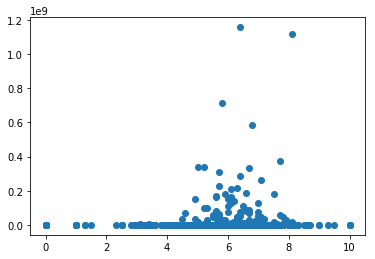

In [18]:
plt.scatter(df_['vote_average'], df_['revenue'])
plt.show()

### Without scaling

In [44]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df_[['vote_average', 'revenue']])
df_['cluster'] = y_predicted
df_[['vote_average', 'revenue', 'cluster']].head()

,vote_average,revenue,cluster
0,7.7,373554033.0,0
50,6.3,0.0,1
100,3.3,0.0,1
150,5.2,336529144.0,0
200,6.3,47774193.0,1


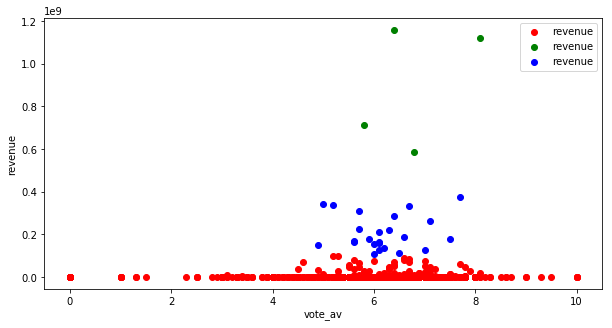

In [35]:
df0 = df_[df_.cluster==0]
df1 = df_[df_.cluster==1]
df2 = df_[df_.cluster==2]

plt.figure(figsize=(10,5))

plt.scatter(df0['vote_average'], df0['revenue'], color='red')
plt.scatter(df1['vote_average'], df1['revenue'], color='green')
plt.scatter(df2['vote_average'], df2['revenue'], color='blue')

plt.xlabel('vote_av')
plt.ylabel('revenue')
plt.legend()

plt.show()

### With Scaling

In [74]:
# Scale properly

scaler = MinMaxScaler()

scaler.fit(df_[['revenue']])
df_['revenue'] = scaler.transform(df_[['revenue']])

scaler.fit(df_[['vote_average']])
df_['vote_average'] = scaler.transform(df_[['vote_average']])

df_[['vote_average', 'revenue', 'cluster']].head()

,vote_average,revenue,cluster
0,0.77,0.322939,0
50,0.63,0.000000,0
100,0.33,0.000000,2
150,0.52,0.290931,2
200,0.63,0.041301,0


In [75]:
km = KMeans(n_clusters=4)

y_predicted = km.fit_predict(df_[['vote_average', 'revenue']])
df_['cluster'] = y_predicted
df_[['vote_average', 'revenue', 'cluster']].head()

,vote_average,revenue,cluster
0,0.77,0.322939,0
50,0.63,0.000000,0
100,0.33,0.000000,2
150,0.52,0.290931,2
200,0.63,0.041301,0


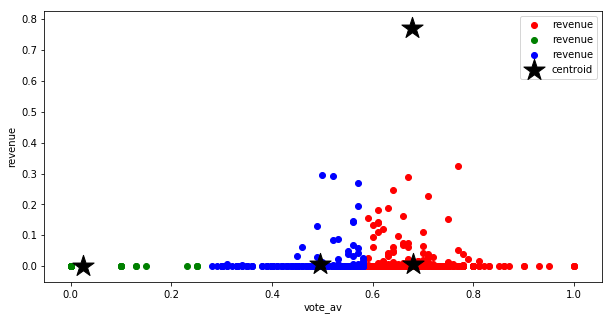

In [76]:
df0 = df_[df_.cluster==0]
df1 = df_[df_.cluster==1]
df2 = df_[df_.cluster==2]

plt.figure(figsize=(10,5))

plt.scatter(df0['vote_average'], df0['revenue'], color='red')
plt.scatter(df1['vote_average'], df1['revenue'], color='green')
plt.scatter(df2['vote_average'], df2['revenue'], color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=500,label='centroid')

plt.xlabel('vote_av')
plt.ylabel('revenue')
plt.legend()

plt.show()

### Elbow plot

In [72]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_[['vote_average', 'revenue']])
    sse.append(km.inertia_)

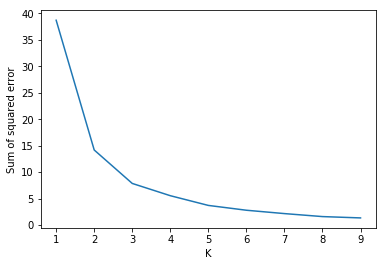

In [73]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
# k=3,4 or 5 is probably the best

# NLP

[ADashOfData](https://github.com/adashofdata/nlp-in-python-tutorial)

## NLTK

In [ ]:
import nltk
# nltk.download()
# from nltk.book import *

In [ ]:
with open ('data/TheOldManAndTheSea.txt', 'r') as f:
    book_txt = f.read()

book_txt = book_txt.lower()

In [ ]:
# Word tokenization

words = nltk.word_tokenize(book_txt)
len (words), len(set(words))

In [ ]:
# Sentence tokenization

sentences = nltk.sent_tokenize(book_txt)
len(sentences), len(set(sentences))

In [ ]:
sentences[-1], words[-5:]

In [ ]:
# Ferquency distribution
dist = FreqDist(words)
dist

In [ ]:
# Frequent words, where a word lenght is greater than or equal to 3 characters and it occurs more than 5 times
freq_words = [w for w in dist.keys() if len(w) >= 3 and dist[w] >= 5]

In [ ]:
# Stemming
porter = nltk.PorterStemmer()

stemmed_words = [porter.stem(w) for w in freq_words]
# stemmed_words

In [ ]:
# Lemmatization
WNLemma = nltk.WordNetLemmatizer()

lemmatized_words = [WNLemma.lemmatize(w) for w in freq_words]
# lemmatized_words

In [ ]:
? nltk.pos_tag

In [ ]:
# Part of Speech (POS) tagging

pos_tag = nltk.pos_tag(words)


In [ ]:
# NLTK classifier

from nltk.classify import NaiveBayesClassifier

classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)


## Sentiment Analysis

### Data Prep

In [ ]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('data/Amazon_Unlocked_Mobile.csv')

# Sample the data to speed up computation
# Comment out this line to match with lecture
df = df.sample(frac=0.1, random_state=10)

df.head()

In [ ]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

In [ ]:
# Most ratings are positive (skewed data set)
df['Positively Rated'].mean()

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [ ]:
print(f'X_train first entry:{X_train.iloc[0]}')
print(f'\n\nX_train shape: {X_train.shape}')

### CountVectorizer (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

# Can specify min_df to reduce number of features
# In the case below, remove words from vocab which appear in less than 5 documents
# vect = CountVectorizer(min_df=5).fit(X_train)  

In [ ]:
vect.get_feature_names()[::2000]  # Look at every 2,000th feature in the vocabulary

In [ ]:
len(vect.get_feature_names())

In [ ]:
# transform the documents in the training data to a document-term matrix
# Gives BOW representation of X_train. X_test
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

X_train_vectorized.shape, X_test_vectorized.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(X_test_vectorized)

print('AUC: ', roc_auc_score(y_test, predictions))

In [ ]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

### Term Frequency Inverse Document Frequency (Tfidf)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
# Remove words from vocab which appear in less than 5 documents
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())  # The num of features reduced to 5442 from 19601

In [ ]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))  # Approx same accuracy with fewer features

In [ ]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

In [ ]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

### n-grams

In [ ]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions)) # Slightly higher accuracy

In [ ]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

In [ ]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

## Topic Modeling

### Data Load

In [1]:
# Read text & store in dictionary

books = ['TheOldManAndTheSea', 'TheAdventuresofSherlock Holmes', 'MobyDick']
data_txt = dict()

for book in books:
    with open (f'data/{book}.txt', 'rb') as f:
        data_txt[book] = f.read()

In [2]:
# Store in DataFrame - book name as key & book text as val

import pandas as pd

pd.set_option('max_colwidth', 200)

# Store each dict val as a list (required for creating DataFrame)        
data_txt = {key:[val] for (key, val) in data_txt.items()}

data_df = pd.DataFrame.from_dict(data_txt).transpose()
data_df.columns = ['Text']
data_df

,Text
TheOldManAndTheSea,"b'\xef\xbb\xbf""What I want you to do,"" said Mr. George Wright, as he leaned towards the\r\nold sailor, ""is to be an uncle to me.""\r\n\r\n""Aye, aye,"" said the mystified Mr. Kemp, pausing with a mug..."
TheAdventuresofSherlock Holmes,b'I. A SCANDAL IN BOHEMIA\r\n\r\n\r\nI.\r\n\r\nTo Sherlock Holmes she is always _the_ woman. I have seldom heard him\r\nmention her under any other name. In his eyes she eclipses and\r\npredominat...
MobyDick,"b'\xef\xbb\xbf\r\nCHAPTER 1. Loomings.\r\n\r\nCall me Ishmael. Some years ago\xe2\x80\x94never mind how long precisely\xe2\x80\x94having\r\nlittle or no money in my purse, and nothing particular t..."


### Data Preprocess

In [3]:
# Basic text cleaning

import re
import string

def clean_text(txt):
    if (type(txt) == bytes):
        txt = txt.decode("utf-8")   # Decode bytes to string
    txt = txt.lower()   # Make lowercase
    txt = ''.join(c for c in txt if c not in set(string.punctuation))   # Remove punctuation
    txt = re.sub('[\r\n]', ' ', txt)   # Remove carriage return & line feed characters
    txt = re.sub('\d*', '', txt)  # Remove numbers
    return (txt)
        
clean = lambda x: clean_text(x)

data_df_clean = pd.DataFrame(data_df.Text.apply(clean))
data_df_clean

,Text
TheOldManAndTheSea,﻿what i want you to do said mr george wright as he leaned towards the old sailor is to be an uncle to me aye aye said the mystified mr kemp pausing with a mug of beer midway to his lips a ...
TheAdventuresofSherlock Holmes,i a scandal in bohemia i to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her se...
MobyDick,﻿ chapter loomings call me ishmael some years ago—never mind how long precisely—having little or no money in my purse and nothing particular to interest me on shore i thought i would sail a...


In [4]:
# Choose words of certain length & frequency and apply stemming

import nltk

def stemming(txt):
    tokenized_words = nltk.word_tokenize(txt)       # Tokenize the text - split into words
    freq_dist = nltk.FreqDist(tokenized_words)      # Get Frequency Distibution of words
    freq_tokenized_words = [w for (w, f) in freq_dist.items() if len(w) >= 3 and f >= 5]  # Remove words less than 3 chars & occurring less than 5 times 
    porter = nltk.PorterStemmer()         # Apply stemming to tokenized list
    stemmed_words = [porter.stem(w) for w in freq_tokenized_words]
    txt = ' '.join(w for w in stemmed_words)   # Join stemmed word list into string
    return (txt)

stem = lambda x: stemming(x)

data_df_clean_stem_freq = pd.DataFrame(data_df_clean.Text.apply(stem))
data_df_clean_stem_freq

,Text
TheOldManAndTheSea,want you said georg wright the old uncl kemp with hi rich young man voic ani next from new zealand who go all money come littl wa youv onli got say ive anoth after and she make that went never tha...
TheAdventuresofSherlock Holmes,scandal bohemia sherlock holm she alway the woman have seldom heard him her under ani other name hi eye and whole wa not that felt emot love for iren adler all one particularli were cold but mind ...
MobyDick,chapter call ishmael some year mind how long littl money purs and noth particular interest shore thought would sail about see the wateri part world way have drive off whenev find myself grow grim ...


In [ ]:
# Pickle original and cleaned corpora

import pickle

# with open ('data/data_df.pkl', 'wb') as f:
#     pickle.dump(data_df, f)
# with open ('data/data_df_clean.pkl', 'wb') as f:
#     pickle.dump(data_df_clean, f)
# with open ('data/data_df_clean_stem_freq.pkl', 'wb') as f:
#     pickle.dump(data_df_clean_stem_freq, f)

### Define Stop Words

In [5]:
# Stop words

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['she', 'he', 'him', 'they', 'and'])

### Data Exploration

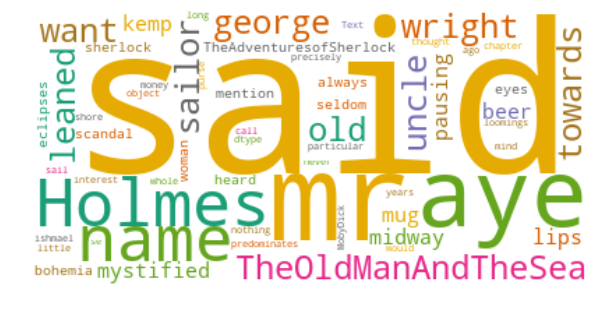

In [6]:
# Generate Word Cloud

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wc.generate(str(data_df_clean.Text))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')


plt.show()

### Extra data prep for gensim - topic modeling (DTM, TDM)

In [ ]:
# Create DTM (document-term matrix)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_df_clean_stem_freq.Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_df_clean_stem_freq.index
data_dtm

In [ ]:
# Pickle the DTM & CountVectorizer object

# with open ('data/data_dtm.pkl', 'wb') as f:
#     pickle.dump(data_dtm, f)
# with open ('data/cv.pkl', 'wb') as f:
#     pickle.dump(cv, f)

In [ ]:
# Construct a TDM (term-document matrix), which is one of the required inputs

data_tdm = data_dtm.transpose()
data_tdm.head()

In [ ]:
# Prepare for gensim

from gensim import matutils, models
import scipy.sparse

# Convert TDM into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(data_tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

# Gensim also requires a dictionary of the all terms and their respective location in the TDM
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

### LDA (Latent Direchlet Allocation)

#### Using basic preprocessed text - no POS (parts of speech) filtering

In [ ]:
# Specify the number of topics and the number of passes for LDA
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=10)
lda.print_topics()

#### Using POS filtering - restrict to Nouns & Adjectives

In [7]:
# Use nouns and adjectves from text which has been basic cleaned

from nltk import word_tokenize, pos_tag

def get_nouns_adj(txt):
    tokenized_words = nltk.word_tokenize(txt)
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    nouns_adj = [word for (word, pos) in pos_tag(tokenized_words) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

nouns_adj = lambda x: get_nouns_adj(x)
data_df_clean_NounsAdj = pd.DataFrame(data_df_clean.Text.apply(nouns_adj))
data_df_clean_NounsAdj

,Text
TheOldManAndTheSea,i george wright old sailor uncle aye mr kemp mug beer midway lips rich uncle young man voice keen ears next bar useless knowledge uncle new zealand money wheres mr kemp little excitement reply you...
TheAdventuresofSherlock Holmes,scandal bohemia i holmes woman i other name eyes whole sex emotion akin irene adler emotions abhorrent cold precise i perfect reasoning machine world lover false position softer passions gibe snee...
MobyDick,﻿ chapter loomings years long precisely—having little money purse nothing particular interest shore i little watery part world way i spleen circulation i grim mouth damp drizzly november soul i co...


In [8]:
# Choose words of certain length & frequency and apply stemming on Nouns & Adjectives

data_df_clean_NounsAdj_stem_freq = pd.DataFrame(data_df_clean_NounsAdj.Text.apply(stem))
data_df_clean_NounsAdj_stem_freq

,Text
TheOldManAndTheSea,georg wright old uncl kemp rich young man voic new money littl ive other itll home time pound week good best pocketbook even way last miss bradshaw few shop mr tomorrow dont bella hill head half
TheAdventuresofSherlock Holmes,scandal bohemia holm woman other name eye whole emot iren adler cold perfect reason machin world lover posit sneer thing veil men reason such own delic doubt result strong natur late memori littl ...
MobyDick,chapter year long littl money purs noth particular interest shore wateri part world way grim mouth damp soul coffin rear funer such upper hand strong principl street peopl high time pistol ball sw...


In [9]:
# Create new DTM (document-term matrix)

from sklearn.feature_extraction.text import CountVectorizer

cv_na = CountVectorizer(stop_words=stop_words, max_df=.8)  # Ignore stop words &  words occurring in 80% of documents
data_cv_na = cv_na.fit_transform(data_df_clean_NounsAdj_stem_freq.Text)
data_dtm_na = pd.DataFrame(data_cv_na.toarray(), columns=cv_na.get_feature_names())
data_dtm_na.index = data_df_clean_NounsAdj_stem_freq.index
data_dtm_na

,abl,abov,absenc,absent,absolut,accid,account,accurs,acquaint,act,...,year,yellow,yesterday,yojo,yonder,york,yourselv,youth,zealand,zodiac
TheOldManAndTheSea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TheAdventuresofSherlock Holmes,1,0,0,0,1,1,1,0,1,0,...,2,1,1,0,0,0,0,1,0,0
MobyDick,1,1,1,1,0,2,2,1,0,1,...,2,1,1,1,1,1,1,1,1,1


In [10]:
# Construct a TDM (term-document matrix), which is one of the required inputs

data_tdm_na = data_dtm_na.transpose()
data_tdm_na.head()

,TheOldManAndTheSea,TheAdventuresofSherlock Holmes,MobyDick
abl,0,1,1
abov,0,0,1
absenc,0,0,1
absent,0,0,1
absolut,0,1,0


In [11]:
# Prepare for gensim

from gensim import matutils, models, corpora
import scipy.sparse

# Convert TDM into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts_na = scipy.sparse.csr_matrix(data_tdm_na)
corpus_na = matutils.Sparse2Corpus(sparse_counts_na)

# Gensim also requires a dictionary of the all terms and their respective location in the TDM
id2word_na = dict((v, k) for k, v in cv_na.vocabulary_.items())

In [12]:
# Specify the number of topics and the number of passes for LDA
lda_na = models.LdaModel(corpus=corpus_na, id2word=id2word_na, num_topics=10, passes=10)
lda_na.print_topics()

[(0,
  '0.000*"murder" + 0.000*"hand" + 0.000*"offic" + 0.000*"pass" + 0.000*"reason" + 0.000*"sound" + 0.000*"peculiar" + 0.000*"dark" + 0.000*"field" + 0.000*"feel"'),
 (1,
  '0.001*"sound" + 0.001*"murder" + 0.001*"live" + 0.001*"harpoon" + 0.001*"feel" + 0.001*"reason" + 0.001*"consider" + 0.001*"offic" + 0.001*"point" + 0.001*"wonder"'),
 (2,
  '0.000*"interest" + 0.000*"reason" + 0.000*"consider" + 0.000*"offic" + 0.000*"murder" + 0.000*"live" + 0.000*"fear" + 0.000*"ground" + 0.000*"sound" + 0.000*"question"'),
 (3,
  '0.000*"hand" + 0.000*"reason" + 0.000*"murder" + 0.000*"feel" + 0.000*"danger" + 0.000*"fact" + 0.000*"care" + 0.000*"affair" + 0.000*"bear" + 0.000*"peculiar"'),
 (4,
  '0.003*"reason" + 0.002*"interest" + 0.002*"remark" + 0.001*"murder" + 0.001*"wonder" + 0.001*"eye" + 0.001*"month" + 0.001*"hour" + 0.001*"one" + 0.001*"mean"'),
 (5,
  '0.000*"reason" + 0.000*"fear" + 0.000*"murder" + 0.000*"success" + 0.000*"point" + 0.000*"feel" + 0.000*"wonder" + 0.000*"sound

In [13]:

# Let's take a look at which topics each transcript contains
corpus_transformed = lda_na[corpus_na]
list(zip([a for [(a,b)] in corpus_transformed], data_dtm_na.index))

[(6, 'TheOldManAndTheSea'),
 (4, 'TheAdventuresofSherlock Holmes'),
 (1, 'MobyDick')]

### Visualize Topic Models

In [16]:
# Visualize the topics
import gensim
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

dict_na = list()
tokenized_words_na = nltk.word_tokenize(str(data_df_clean_NounsAdj_stem_freq.Text))
dict_na.append(tokenized_words_na)

dictionary_na = gensim.corpora.Dictionary(dict_na)
print (dictionary)
print (corpus_na)
print (lda_na)

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_na, corpus_na, dictionary_na)

# vis = pyLDAvis.gensim.prepare(lda_na, corpus_na, dictionary, sort_topics=True)
# pyLDAvis.display(vis)
# pyLDAvis.enable_notebook()

Dictionary(103 unique tokens: [',', '...', ':', 'Holmes', 'MobyDick']...)
LdaModel(num_terms=2485, num_topics=10, decay=0.5, chunksize=2000)


ValidationError: 
 * Not all rows (distributions) in topic_term_dists sum to 1.

In [ ]:
print dictionary
print corpus
print lda

### Another LDA Implementation (end to end)

In [ ]:
import nltk
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Sentence tokenization
sentences = nltk.sent_tokenize(txt)

# Stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 't', 'edu', 'use'])

# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 2 documents,
# remove tokens that appear in more than 20% of the documents
vect = CountVectorizer(min_df=2, max_df=0.2, stop_words=stop_words, 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b').fit(sentences)

# Transform into DTM
X = vect.transform(sentences)

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())

In [ ]:
# Stemming
porter = nltk.PorterStemmer()

stemmed_words = [porter.stem(w) for w in sentences]
# stemmed_words

In [ ]:
# Build LDA model

from gensim import corpora, models

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id_map,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id_map)
vis

In [ ]:
id_map

# Model Deployment

- [Tutorial: Create an Azure Workspace](https://docs.microsoft.com/en-us/azure/machine-learning/service/tutorial-1st-experiment-sdk-setup)

- [Tutorial: Deploy an image classification model in Azure Container Instances](https://docs.microsoft.com/en-us/azure/machine-learning/service/tutorial-deploy-models-with-aml)

- [Model Deployment Notebook](https://drive.google.com/file/d/1zxXOBhTTUCyGSGu3HEqbxVQ4WYLEEkGp/view?usp=sharing)

# Deep Learning

## [Regression,  Multiclass classification](https://github.com/jeffheaton/t81_558_deep_learning/blob/cee8fcc5afedbee9536f52ef9725d67cf1584952/t81_558_class_03_2_keras.ipynb)
    

## [Early Stopping](https://github.com/jeffheaton/t81_558_deep_learning/blob/cee8fcc5afedbee9536f52ef9725d67cf1584952/t81_558_class_03_4_early_stop.ipynb)

## Transfer Learning

### Using model output


[Transfer Learning using VGG16 Notebook](https://drive.google.com/file/d/1l6WaDZcSXmI9VoWsBG1aOwgDdFdu0nTi/view?usp=sharing)

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

num_classes = len(labels)

vgg16_model = VGG16(include_top=False, input_shape=(224,224,3))

for layer in vgg16_model.layers:
    layer.trainable = False
    
x = vgg16_model.output
x = Flatten()(x)    
x = Dense(num_classes, activation='softmax')(x)

model = Model(vgg16_model.input, x)

In [ ]:
X_train_preproc = preprocess_input(X_train)
X_test_preproc = preprocess_input(X_test)

In [ ]:
batch_size = 32
epochs = 10

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_1hot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test_1hot))
score = model.evaluate(X_test, y_test_1hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Plot Training & Validation Loss
plot_hist(history)

### Sequential layering

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

vgg16_model = VGG16()
# vgg16_model.summary()

model = Sequential()
input_shape = [None, 224, 224, 3]

for layer in vgg16_model.layers[:-1]:
    model.add(layer)

model.build(input_shape)

# model.layers.pop()    

In [ ]:
for layer in model.layers:
    layer.trainable = False
    
model.add (Dense(2, activation='softmax'))

In [ ]:

model.summary()

## Feed Forward NN

In [ ]:
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

def plot_hist(history):
  history_dict=history.history
  loss_values = history_dict['loss']
  val_loss_values=history_dict['val_loss']
  plt.figure(figsize=(10,6))
  plt.xlabel('Epochs')
  plt.plot(loss_values, color='Blue', linestyle='dashed', marker='o', label='Training Loss')
  plt.plot(val_loss_values,color='Red', label='Validation Loss')
  plt.legend()
  plt.show()

def model1(X, y):
  name = 'Model 1'

  input_shape = X[0].shape

  model = Sequential()
  model.add(Dense(256, input_shape=input_shape, activation='softmax'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer='adam', 
                loss='mean_absolute_error',
                metrics=['mean_absolute_error'])

  # Runs model and assigns it to 'history'
  history = model.fit(X, y, epochs = 200, batch_size=32, validation_split = 0.2, verbose=0)

  y_pred = model.predict(X)
  print(f'{name}: The R2 score on the Train set is:\t{r2_score(y, y_pred):.3f}')
  print(f'{name}: The Mean Absolute Error on the Train set is:\t{mean_absolute_error(y, y_pred):.3f}')
  
  # Plot Training & Validation Loss
  plot_hist(history)
  
  return(model)

In [ ]:
X = scale('standard', df3.iloc[:,:-1])
y = df3.iloc[:,-1]
iters = 1

for iter in range(iters):
  model_1 = model1(X, y)

# Saving & Loading Model

In [ ]:
from sklearn.externals import joblib
import pickle

# with open('../data/models/lgbm1.joblib', 'wb') as joblibfile:
#     joblib.dump(lgbm, joblibfile)
    
# with open('../data/models/lgbm1.joblib', 'rb') as joblibfile:
#     lgbm = joblib.load(joblibfile)


# with open('../data/models/lgbm1.pkl', 'wb') as pklfile:
#     pickle.dump(lgbm, pklfile)
    
with open('../data/models/lgbm1.pkl', 'rb') as pklfile:
    lgbm = pickle.load(pklfile)

[YAML, JSON, HDF5 formats](https://github.com/jeffheaton/t81_558_deep_learning/blob/cee8fcc5afedbee9536f52ef9725d67cf1584952/t81_558_class_03_3_save_load.ipynb) 


# Warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings(action='once')

# Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline

cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(11,7))
sn.heatmap(cm_tree, annot=True)
plt.title(f'Confusion Matrix - Decision tree\nTest data score = {tree_score*100:.2f}%')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Correlation

In [ ]:
import pandas as pd

corr = df3.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')
pd.DataFrame(corr).transpose().style.background_gradient(cmap='coolwarm')

In [ ]:
for feature in corr['winner'].iteritems():
  if ((feature[1] >= 0.1) or (feature[1] <= -0.1)):  # Features with +ve or -ve correlation with 'winner' of > 10% 
    print (feature)

# Feature Importance

In [ ]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# LightGBM
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    objective='binary', metric='binary_logloss', n_estimators=100, num_leaves=10,
      )
lgbm.fit(X_train, y_train)
lgbm_score = lgbm.score(X_test, y_test)
print (f'LightGBM score on test data = {lgbm_score*100:.2f}%')

y_pred_lgbm = lgbm.predict(X_test)

In [ ]:
import seaborn as sn

def feature_imp(clf, X):
  threshold = 0.5
  feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)), columns=['Value','Feature'])
  feature_imp_sorted = feature_imp.sort_values(by="Value", ascending=False)

  print (f'Threshold = {threshold}')
  print (feature_imp_sorted[feature_imp_sorted['Value'] >= threshold])
  plt.figure(figsize=(15, 12))
  sn.barplot(x="Value", y="Feature", data=feature_imp_sorted)
  plt.title(type(clf))
  plt.show()

In [ ]:
feature_imp(lgbm, X_train)

# OOP

In [3]:
class Transportation():
    def __init__(self, category):
        self.category = category
        
    def get_category(self):
        return (self.category)
    
class Car(Transportation):
    def __init__(self, make, fueltype, doors, color, top_speed):
        super().__init__
        self.make = make
        self.fueltype = fueltype
            
    def get_make(self):
        return(self.make)
    
c = Car('Toyota', 'petrol', 4, 'Blue', 180)
c.category = 'land'
c.get_category(), c.get_make()

('land', 'Toyota')

## Overriding Parent Methods

In [4]:
class Fish:
    def __init__(self, first_name, last_name="Fish",
                 skeleton="bone", eyelids=False):
        self.first_name = first_name
        self.last_name = last_name
        self.skeleton = skeleton
        self.eyelids = eyelids

    def swim(self):
        print("The fish is swimming.")

    def swim_backwards(self):
        print("The fish can swim backwards.")

        
class Shark(Fish):
    def __init__(self, first_name, last_name="Shark",
                 skeleton="cartilage", eyelids=True):
        self.first_name = first_name
        self.last_name = last_name
        self.skeleton = skeleton
        self.eyelids = eyelids

    def swim_backwards(self):
        print("The shark cannot swim backwards, but can sink backwards.")
        
sammy = Shark("Sammy")
print(sammy.first_name + " " + sammy.last_name)
sammy.swim()
sammy.swim_backwards()
print(sammy.eyelids)
print(sammy.skeleton)

Sammy Shark
The fish is swimming.
The shark cannot swim backwards, but can sink backwards.
True
cartilage


## The super() Function

In [5]:
class Trout(Fish):
    def __init__(self, water = "freshwater"):
        self.water = water
        super().__init__(self)

terry = Trout()

# Initialize first name
terry.first_name = "Terry"

# Use parent __init__() through super()
print(terry.first_name + " " + terry.last_name)
print(terry.eyelids)

# Use child __init__() override
print(terry.water)

# Use parent swim() method
terry.swim()


Terry Fish
False
freshwater
The fish is swimming.
